<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logestic Regression Project-Breast Cancer

## About Dataset:

### This dataset related to breast cancer and contains various features describing the characteristics of cell nuclei present in breast biopsy samples. Each row corresponds to a particular biopsy sample, and the columns represent different features measured for each sample. Here's a brief explanation of some of the columns:

*   id: A unique identifier for each biopsy sample.
*   diagnosis: The target variable indicating whether the sample is malignant (M) or benign (B).
*   radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean: These are mean values of different characteristics measured from the cell nuclei.
*   radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se: These are standard errors of the corresponding mean features.
*   radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst: These represent the "worst" or largest values of the corresponding features.

### The Breast Cancer dataset is available from:
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

### Import Libreraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Create Dataframe by Pandas

In [2]:
df = pd.read_csv('cancer.csv')

## EDA : Exploratory Data Analysis

In [3]:
#show 10 top data
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
#show name of columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
#show dimention of dataframe
df.shape

(569, 33)

In [6]:
#show information about the data types, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#show the unique values in the 'diagnosis' column
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
#show distribution of values in the 'diagnosis' column
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Convert Categorical to Numerical of values in target

In [9]:
df['diagnosis'] = [ 1 if i == 'M' else 0 for i  in df['diagnosis']]

In [10]:
#check the column
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

## Clean data

In [11]:
#remove 2 columns
df= df.drop(['id','Unnamed: 32'],axis = 1)

In [12]:
#check the new dimention of dataframe
df.shape

(569, 31)

## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test , y_train , y_test = train_test_split(df.drop('diagnosis', axis = 1), df['diagnosis'], test_size= 0.2, random_state= 42)

## Scale data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
mms = MinMaxScaler()

In [17]:
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

## Build The Model

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
LR=LogisticRegression()

In [20]:
LR.fit(X_train,y_train)

LogisticRegression()

In [21]:
pred = LR.predict(X_test)

## Evaluation

In [22]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [23]:
cm = confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

In [24]:
print(cm)
print("----------------------------")
print(cr)

[[71  0]
 [ 2 41]]
----------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Results



*   Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0, it's 0.97, indicating that 97% of the instances predicted as class 0 were actually class 0. For class 1, it's 1.00, indicating perfect precision for class 1.
*   Recall: Recall, or sensitivity, is the ratio of correctly predicted positive observations to the all observations in the actual class. For class 0, it's 1.00, indicating that the model captured all instances of class 0. For class 1, it's 0.95, meaning the model captured 95% of instances of class 1.



*   F1-Score: The F1-Score is the weighted average of precision and recall. It's a metric that combines both precision and recall into a single value. For class 0, it's 0.99, and for class 1, it's 0.98.

The model performs well with high precision, recall, and F1-scores for both classes. Class 0 has slightly higher precision, while class 1 has slightly lower recall. The overall accuracy of the model is 98%, suggesting good performance on the evaluated dataset.






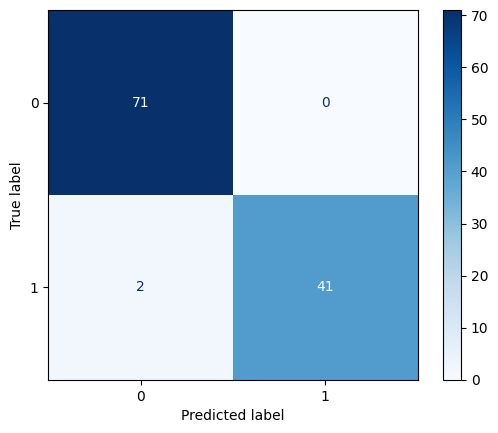

In [25]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
cm_display.plot(cmap='Blues', values_format='d');